# Random Forest Challenge - Spotify Dataset

Developing a high accuracy model based on spotify songs (labelled 1 for 'like'  or 0 for 'dislike') to predict whether this particular user will like or dislike a song he/she has never heard.

## Checklist
1. Import Dataset
2. EDA to visualize data and observe structure
3. Train a classifier
4. Predict target using the trained classifier

## Imports

In [1]:
import pandas as pd
import numpy as np

import scipy
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn import ensemble

import time

import seaborn as sns

%matplotlib inline

C:\Users\sebar\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
spotify = pd.read_csv('spotify.csv')

In [3]:
type(spotify)

pandas.core.frame.DataFrame

## Understanding the Data

In [4]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [5]:
spotify.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [6]:
spotify.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


## EDA

In [7]:
pos_tempo = spotify[spotify['target'] == 1]['tempo']
neg_tempo = spotify[spotify['target'] == 0]['tempo']

pos_dance = spotify[spotify['target'] == 1]['danceability']
neg_dance = spotify[spotify['target'] == 0]['danceability']

pos_duration = spotify[spotify['target'] == 1]['duration_ms']
neg_duration = spotify[spotify['target'] == 0]['duration_ms']

pos_loudness = spotify[spotify['target'] == 1]['loudness']
neg_loudness = spotify[spotify['target'] == 0]['loudness']

pos_speechiness = spotify[spotify['target'] == 1]['speechiness']
neg_speechiness = spotify[spotify['target'] == 0]['speechiness']

pos_valence = spotify[spotify['target'] == 1]['valence']
neg_valence = spotify[spotify['target'] == 0]['valence']

pos_energy = spotify[spotify['target'] == 1]['energy']
neg_energy = spotify[spotify['target'] == 0]['energy']

pos_acousticness = spotify[spotify['target'] == 1]['acousticness']
neg_acousticness = spotify[spotify['target'] == 0]['acousticness']

pos_key = spotify[spotify['target'] == 1]['key']
neg_key = spotify[spotify['target'] == 0]['key']

pos_instrumentalness = spotify[spotify['target'] == 1]['instrumentalness']
neg_instrumentalness = spotify[spotify['target'] == 0]['instrumentalness']

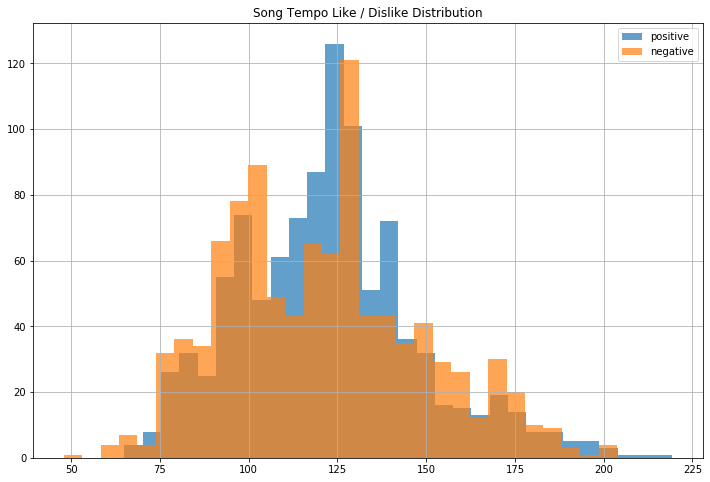

In [8]:
fig = plt.figure(figsize=(12,8))
plt.title('Song Tempo Like / Dislike Distribution')
pos_tempo.hist(alpha = 0.7, bins = 30, label = 'positive')
neg_tempo.hist(alpha = 0.7, bins = 30, label = 'negative')
plt.legend(loc= 'upper right')

Not too much to extract from what we're seeing.

C:\Users\sebar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
C:\Users\sebar\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\sebar\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the

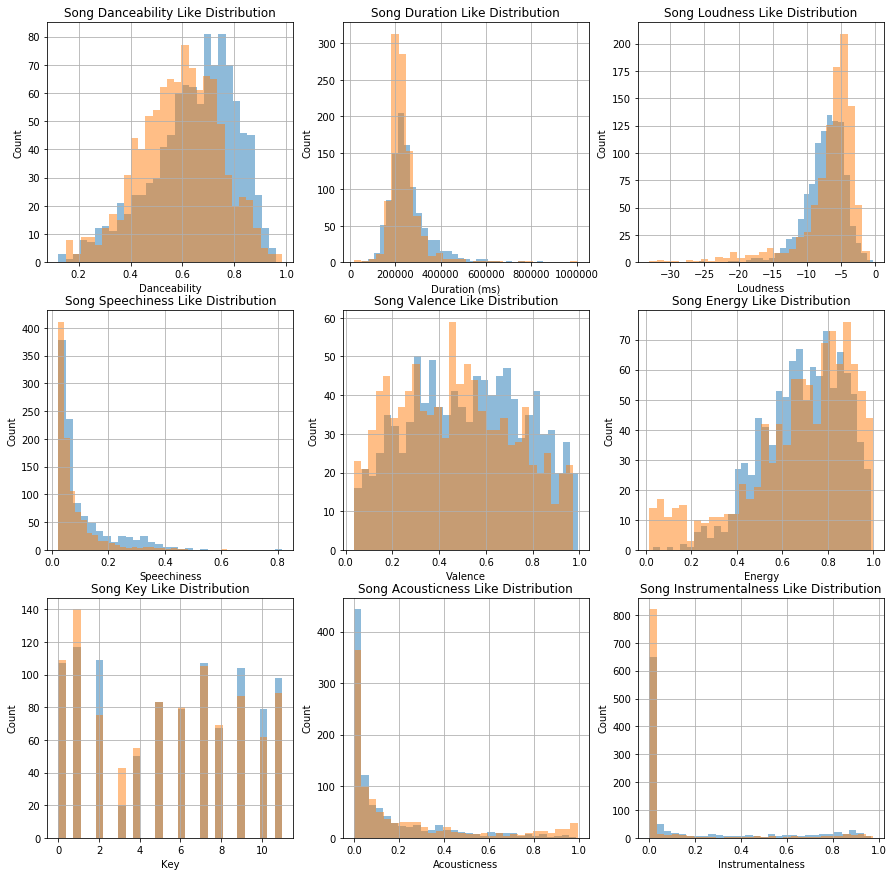

In [9]:
fig2 = plt.figure(figsize= (15, 15))

# Danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title('Song Danceability Like Distribution')
pos_dance.hist(alpha = 0.5, bins = 30)
ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha = 0.5, bins=30)

# Duration
ax5 = fig2.add_subplot(332)
pos_duration.hist(alpha=0.5, bins=30)
ax5.set_xlabel('Duration (ms)')
ax5.set_ylabel('Count')
ax5.set_title("Song Duration Like Distribution")
ax6 = fig2.add_subplot (332)
neg_duration.hist(alpha=0.5, bins=30)

# Loudness
ax7 = fig2.add_subplot (333)
pos_loudness.hist (alpha=0.5, bins=30)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title("Song Loudness Like Distribution")

ax8 = fig2.add_subplot(333)
neg_loudness.hist(alpha=0.5, bins=30)
               
# Speechiness
ax9 = fig2.add_subplot (334)
pos_speechiness.hist(alpha=0.5, bins=30)
ax9.set_xlabel('Speechiness')
ax9.set_ylabel('Count')
ax9.set_title("Song Speechiness Like Distribution")
ax10 = fig2.add_subplot (334)
neg_speechiness.hist(alpha=0.5, bins=30)

# Valence
ax11 = fig2.add_subplot(335)
pos_valence. hist(alpha=0.5, bins=30)
ax11.set_xlabel("Valence")
ax11.set_ylabel('Count')
ax11.set_title("Song Valence Like Distribution")
ax12 = fig2.add_subplot(335)
neg_valence.hist(alpha=0.5, bins=30)

# Energy
ax13 = fig2.add_subplot (336)
pos_energy. hist(alpha=0.5, bins=32)
ax13.set_xlabel('Energy')
ax13.set_ylabel('Count')
ax13.set_title("Song Energy Like Distribution")
ax14 = fig2.add_subplot (336)
neg_energy. hist(alpha=0.5, bins=30)

# Key
ax15 = fig2.add_subplot (337)
pos_key.hist(alpha=0.5, bins=30)
ax15.set_xlabel("Key")
ax15.set_ylabel('Count')
ax15.set_title("Song Key Like Distribution")
ax15 = fig2.add_subplot (337)
neg_key. hist(alpha=0.5, bins=30)
                
# Acousticness
ax16 = fig2.add_subplot (338)
pos_acousticness.hist(alpha=0.5, bins=30)
ax16.set_xlabel('Acousticness')
ax16.set_ylabel('Count')
ax16.set_title("Song Acousticness Like Distribution")
ax16 = fig2.add_subplot (338)
neg_acousticness.hist(alpha=0.5, bins=30)

# Instrumentalness
ax17 = fig2.add_subplot (339)
pos_instrumentalness.hist(alpha=0.5, bins=30)
ax17.set_xlabel('Instrumentalness')
ax17.set_ylabel('Count')
ax17.set_title("Song Instrumentalness Like Distribution")
ax17 = fig2.add_subplot (339)
neg_instrumentalness.hist(alpha=0.5, bins=30)

Key maps to standard musical notation, 0 is key of C

- E flat or D sharp has the lowest number of observations as well as the highest relative distribution of dislike to like.
- Slight bias towards preferring a positive valence
- Slight preference for slightly lower energy songs relative to higher energy songs but a large number of disliked songs on the lower end of the energy spectrum
- Not much structure for Acousticness or instrumentalness. Most of the songs listened to are at the very extreme low end. Same thing goes for speechiness.
- Strong dislike for songs on the louder end of the spectrum.

## Modeling

### Decision Tree Implementation

In [10]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

In [11]:
Y = spotify['target']

X = spotify[['tempo', 'danceability', 'loudness', 'valence', 'energy',
             'instrumentalness', 'acousticness', 'key',
             'speechiness', 'duration_ms']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=465)

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
print(len(y_test), len(y_pred))

NameError: name 'y_pred' is not defined

In [ ]:
# Initialize and train our tree.
start_time = time.time()

decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4
)

dt = decision_tree.fit(X_train, y_train)

# Render our tree.
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names= X_train.columns,
    class_names=['Liked', 'Disliked'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)

print("--- %s seconds ---" % (time.time() - start_time))

Image(graph.create_png())

In [ ]:
y_pred = dt.predict(X_test)

In [ ]:
pred

In [ ]:
accuracy_score(y_test, y_pred)

### Random Forest

Without dummies:

In [ ]:
start_time = time.time()

print("--- %s seconds ---" % (time.time() - start_time))

rfc = ensemble.RandomForestClassifier()
cross_val_score(rfc, X, Y, cv=5)

With dummies:

In [ ]:
start_time = time.time()

rfc = ensemble.RandomForestClassifier()
X_dummies = pd.get_dummies(X)

print("--- %s seconds ---" % (time.time() - start_time))

cross_val_score(rfc, X_dummies, Y, cv=5)

## Final Thoughts

Very good predictive accuracy to begin with. could improve through feature engineering and hyperparameter tuning.